In [1]:
# 이진분류... 분류기 함수.. 소프트 맥스
# 다중분류.. 각각의 이진분류를 수행해서 가장 높은 확률을 가지는 클래스를 선택 - 각각에 시그모이드 함수를 적용
#          : 소프트맥스
# 딥러닝.. 활성함수라는 개념이 나오는데.. 이진분류면.. sigmoid  다중이면 softmax
# 각레이어마다 활성함수는 relu.... 최종 결과... 이진이면 sigmoid  다중 softmax 

In [2]:
from sklearn.datasets import load_digits
data = load_digits()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
import matplotlib.pyplot as plt

def showimage(img,title):
  plt.imshow(img,cmap='gray_r')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.show()

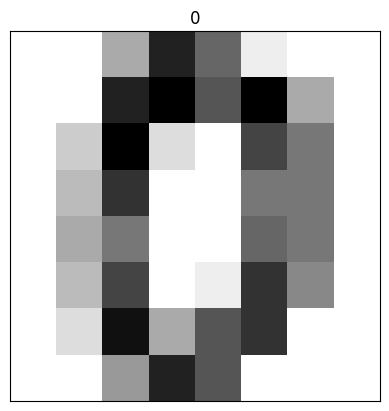

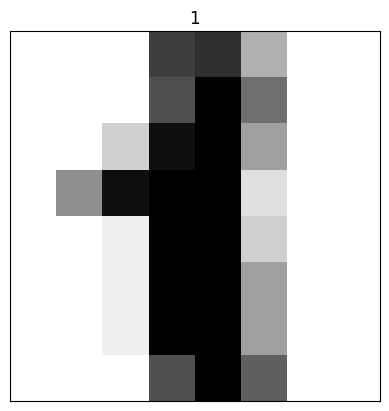

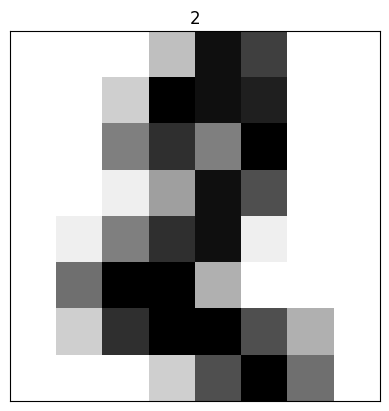

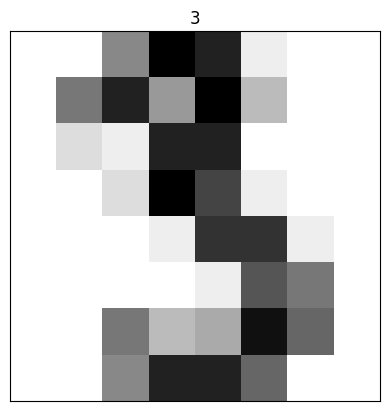

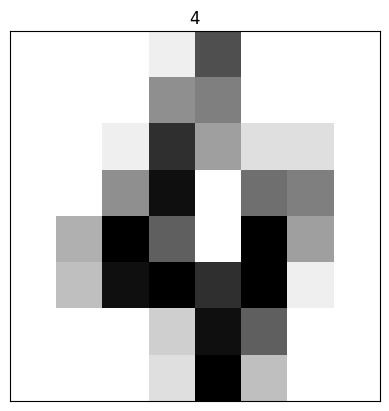

In [5]:
for idx, img in enumerate( data['images'][:5]):
  showimage(img,data['target_names'][idx])

In [6]:
X = data['data']
y = data['target']

In [7]:
from sklearn.linear_model import LogisticRegression
logreg_ovr = LogisticRegression(multi_class="ovr",max_iter=10000)  # 모든 클래스를 이진형태의 모델로 만들어 학습
logreg_softmax = LogisticRegression(multi_class="multinomial", solver='sag',max_iter=10000)  # 소프트맥스 +경사하강법적용

In [8]:
# 데이터 분류
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test =  ss.transform(x_test)

logreg_ovr.fit(x_train,y_train)
logreg_softmax.fit(x_train,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [10]:
logreg_ovr.score(x_test,y_test)

0.9688888888888889

In [11]:
from sklearn.metrics import confusion_matrix #, accuracy_score,precision_score,f1_score
conf_matrix = confusion_matrix(y_test, logreg_ovr.predict(x_test) )
conf_matrix

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  1,  0],
       [ 0,  2,  0,  0,  0,  1,  1,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  2, 41]])

In [12]:
sum([conf_matrix[i][i] for i in range(len(conf_matrix))]) / len(y_test)

0.9688888888888889

In [13]:
sum([conf_matrix[i][i] for i in range(len(conf_matrix))])


436

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_ovr.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.95      0.97      0.96        37
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        39
           4       1.00      0.96      0.98        54
           5       0.98      0.98      0.98        43
           6       0.96      0.98      0.97        47
           7       0.96      0.98      0.97        44
           8       0.86      0.90      0.88        41
           9       0.98      0.91      0.94        45

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

